# Regression

## Diabetes

Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Over time, having too much glucose in your blood can cause health problems, such as heart disease, nerve damage, eye problems, and kidney disease. You can take steps to prevent diabetes or manage it. 

As of 2014, 29.1 million people in the United States, or 9.3 percent of the population, have diabetes. One in four people with diabetes don’t know they have the disease. An estimated 86 million Americans aged 20 years or older have prediabetes.

Reference: https://www.niddk.nih.gov/health-information/diabetes

Risk factors:http://www.mayoclinic.org/diseases-conditions/diabetes/basics/risk-factors/con-20033091

# Diabetes Dataset

Reference: http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

*Ten baseline variables, age, sex, body mass index, average blood pressure, and six blood serum measurements were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure of disease progression one year after baseline; where* $BMI = kg/m^2$

## Python Quick Review

If you are less familiar with Python, you might want to review the materials in the [DeCART Boot Camp, Part 2: Introduction to Python](https://github.com/UUDeCART/decart_bootcamp_part2), in particular our [Python crash course](https://github.com/UUDeCART/decart_bootcamp_part2/blob/master/modules/module1/python_crash_course.ipynb).

## [Pandas](http://pandas.pydata.org/) Review

Pandas it a Python package for working with tabular data that was developed in the finance community. Pandas will be our main framework for working with data and standard Python packages for machine learning, like [scikit-learn](http://scikit-learn.org/stable/) all work natively with Pandas DataFrames and Series.

### [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)



### Functions in Python

Python functions take some input (possibly nothing), manipulates data (possibly by doing nothing), and returns some output (possibly nothing, denoted by the special Python value `None`).

In [1]:
def myfunction():
    P=[1,2,'3']
    return P
myfunction()

[1, 2, '3']

### Analysis of `myFunction`

* What goes in?
    * Nothing
* What data manipulation does `myFunction` do?
    * Nothing
* What comes out?
    * A Python `list` containing the integers `1` and `2` and the string `"3"`


In [2]:
L1=1
P1=['1','b']
a1='1.5'
_,L2,P2=L1,P1,a1
print(L2,P2)

['1', 'b'] 1.5


### Notes

* `_` is by convention in Python a throw away variable
* `print` is an example that takes some input and provides as output a string printed to standard output (the screen)

### Construct a Pandas DataFrame

In [3]:
import pandas as pd
L=pd.DataFrame({'a':[4,5,6,6],'b':[7,8,12.8,9],'c':[10,11,12,10]},
  index=[1,2,3,4],
  columns=['a','b','c'])
print (L)

   a     b   c
1  4   7.0  10
2  5   8.0  11
3  6  12.8  12
4  6   9.0  10


### If we let the Notebook evaluate a Pandas DataFrame (e.g. `L`), it will provide a nice HTML table

In [5]:
L

,a,b,c
1,4,7.0,10
2,5,8.0,11
3,6,12.8,12
4,6,9.0,10


### Pandas DataFrame Object
 
Python is primarily an [object oriented programming language](https://en.wikipedia.org/wiki/Object-oriented_programming). By contrast, R is a [functional programming language](https://en.wikipedia.org/wiki/Functional_programming)

In an object oriented programming language, objects have attributes and **methods**. Methods are special functions that operate on the attributes of the object.

In our example object, `L`, the attributes are the data values (contained in the columns `a`, `b`, and `c` and rows `1`,  `2`, `3`, and `4`.

If we want to learn what methods the `L` has, we can use the `help` function.

In [6]:
help(L)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame)
 |  Two-dimensional size-mutable, potentially heterogeneous tabular data
 |  structure with labeled axes (rows and columns). Arithmetic operations
 |  align on both row and column labels. Can be thought of as a dict-like
 |  container for Series objects. The primary pandas data structure
 |  
 |  Parameters
 |  ----------
 |  data : numpy ndarray (structured or homogeneous), dict, or DataFrame
 |      Dict can contain Series, arrays, constants, or list-like objects
 |  index : Index or array-like
 |      Index to use for resulting frame. Will default to np.arange(n) if
 |      no indexing information part of input data and no index provided
 |  columns : Index or array-like
 |      Column labels to use for resulting frame. Will default to
 |      np.arange(n) if no column labels are provided
 |  dtype : dtype, default None
 |      Data type to force, otherwise infer
 |  copy : boolean, d

### Example DataFrame and Series methods

We will look at the following methods that are useful for summarizing our data

* [`describe()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)
    * A method for either DataFrames or Series
* [`value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
    * A method for Series
* [`groupby`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html)

In [7]:
L.describe()

,a,b,c
count,4.000000,4.000000,4.000000
mean,5.250000,9.200000,10.750000
std,0.957427,2.535087,0.957427
min,4.000000,7.000000,10.000000
25%,4.750000,7.750000,10.000000
50%,5.500000,8.500000,10.500000
75%,6.000000,9.950000,11.250000
max,6.000000,12.800000,12.000000


In [8]:
L['a'].value_counts()

6    2
5    1
4    1
Name: a, dtype: int64

4         Axes(0.1,0.559091;0.363636x0.340909)
5    Axes(0.536364,0.559091;0.363636x0.340909)
6             Axes(0.1,0.15;0.363636x0.340909)
dtype: object

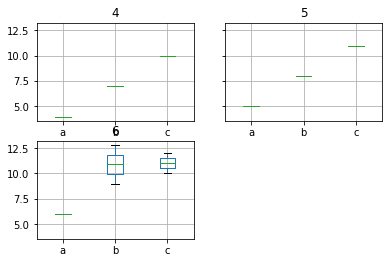

In [13]:
L.groupby("a").boxplot()

In [14]:
L.groupby(['a','c']).mean()

b
a c       
4 10   7.0
5 11   8.0
6 10   9.0
  12  12.8

In [ ]:
import numpy as np
a = np.arange(6)
print(a)
a=a.reshape((3, 2))
print(a)

###  [DS package](./DS.py)

I have created a Python package (file) containing functions that we will use. In order to access the functions in our notebook, we need to `import` it.


In [ ]:
import DS

### Reloading a Package

If we change the DS.py file, we will not see those changes in this notebook unless we restart the notebook or `reload` the package. To reload the package, past the code below into a code cell and evalaute.

```Python
import importlib
importlib.reload(DS)
```

In [17]:
import importlib
importlib.reload(DS)

<module 'DS' from '/home/jovyan/work/predictive_analytics/Day1_Python/DS.py'>

In [18]:
help(DS.main)

Help on function main in module DS:

main()
    This function prompts the user for which analysis they want to run and which data set to run the analysis on.
    
    The function returns three Pandas DataFrames:
    
    1. ???
    2. ???
    3.???



In [ ]:
L1,L2,L3=DS.main()

### What is our Output

* `L1` our original data
* `L2`: the data we will use to predict with
* `L3`: what we are going to predict

### Here are some functions to explore our Data

They take as arguments the index for the data set we want to examine:

* `0` for diabetes
* `1` for Parkinson's

Change the value of `which_data` to see the two data sets.

The mean/SD of  AGE  are  48.5180995475 / 13.109027822
The mean/SD of  SEX  are  1.46832579186 / 0.499561170435
The mean/SD of  BMI  are  26.3757918552 / 4.41812156062
The mean/SD of  BP  are  94.6470135747 / 13.8312834198
The mean/SD of  S1  are  189.140271493 / 34.608051675
The mean/SD of  S2  are  115.439140271 / 30.4130809693
The mean/SD of  S3  are  49.7884615385 / 12.9342021549
The mean/SD of  S4  are  4.07024886878 / 1.29044989661
The mean/SD of  S5  are  4.64141085973 / 0.522390561069
The mean/SD of  S6  are  91.2601809955 / 11.4963347393
The mean/SD of  QMDP1Y  are  152.133484163 / 77.093004533
Press Any Key...


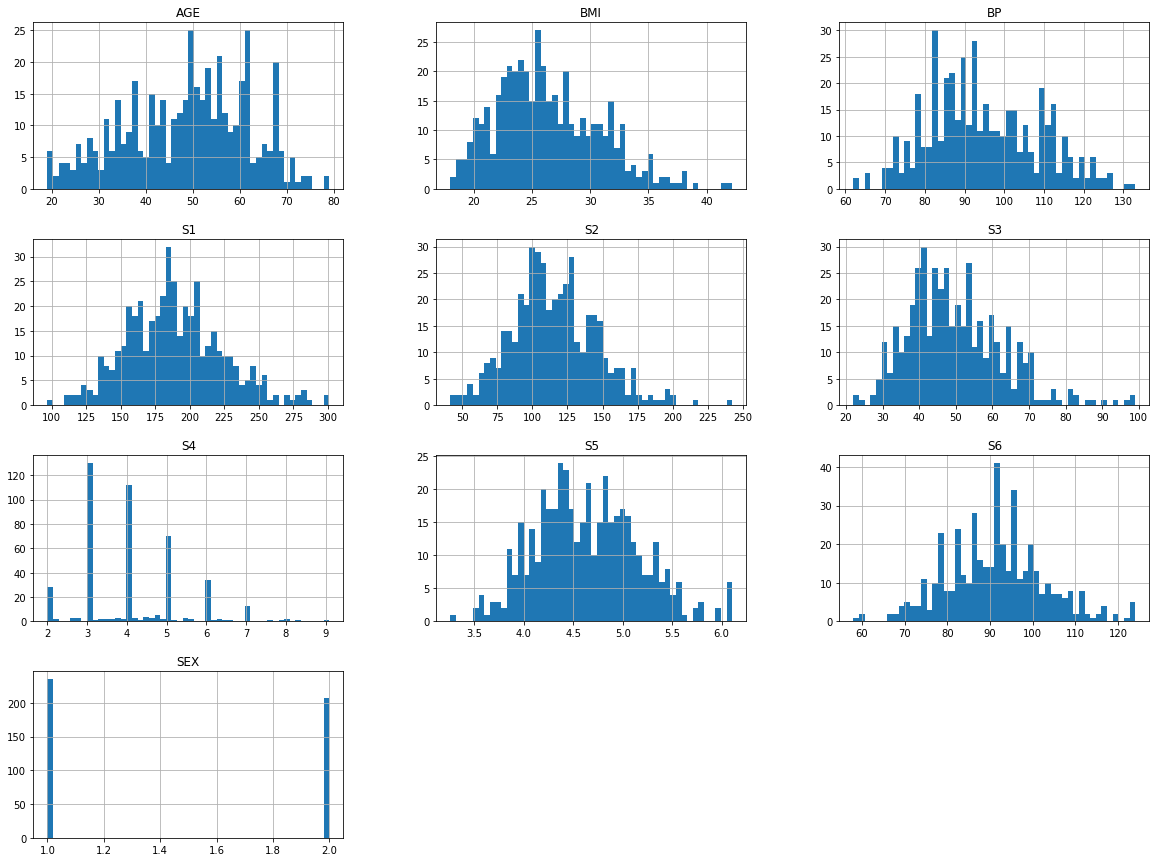

In [24]:
which_data = 0
x,_ = DS.numDes(which_data), DS.meanSDDes(which_data)

### `x` is a dictionary of DataFrame and Series containing the results of a `describe` method call on our predictors and targets

In [25]:
x.keys()

dict_keys(['myTrain', 'myVal'])

In [26]:
x["myTrain"]

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
count,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000,442.000000
mean,48.518100,1.468326,26.375792,94.647014,189.140271,115.439140,49.788462,4.070249,4.641411,91.260181
std,13.109028,0.499561,4.418122,13.831283,34.608052,30.413081,12.934202,1.290450,0.522391,11.496335
min,19.000000,1.000000,18.000000,62.000000,97.000000,41.600000,22.000000,2.000000,3.258100,58.000000
25%,38.250000,1.000000,23.200000,84.000000,164.250000,96.050000,40.250000,3.000000,4.276700,83.250000
50%,50.000000,1.000000,25.700000,93.000000,186.000000,113.000000,48.000000,4.000000,4.620050,91.000000
75%,59.000000,2.000000,29.275000,105.000000,209.750000,134.500000,57.750000,5.000000,4.997200,98.000000
max,79.000000,2.000000,42.200000,133.000000,301.000000,242.400000,99.000000,9.090000,6.107000,124.000000


In [27]:
x["myVal"]

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: QMDP1Y, dtype: float64

### [Feature Scaling](https://en.wikipedia.org/wiki/Feature_scaling)

Because our features have different natural scales, we want to transform them so that they have similar scales.

`dataScaling` read in a data set and performs a [`minmax_scale`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.minmax_scale.html#sklearn.preprocessing.minmax_scale) transformation on each column.

```Python
def dataScaling(index=0,taskID='filesReg'):
    data,myTrain,myVal=load_data(index,taskID)
    for name in myTrain.columns:
        if (not(myTrain[name].dtype=='O')):
            myTrain[name]=pre.minmax_scale(myTrain[name].astype('float'))             
    return data,myTrain,myVal
```


In [28]:
_,L6,_=DS.dataScaling(0)

In [30]:
L6.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333


In [53]:
pd.__version__

'0.19.2'

In [58]:
L6.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6'], dtype='object')

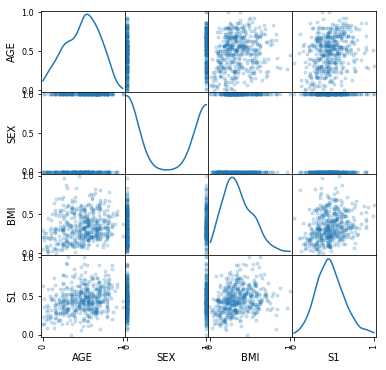

In [60]:
_ = pd.tools.plotting.scatter_matrix(L6[['AGE', 'SEX', 'BMI', 'S1']], alpha=0.2, figsize=(6, 6), diagonal='kde')

### Or we could use [Seaborn](https://seaborn.pydata.org/index.html)

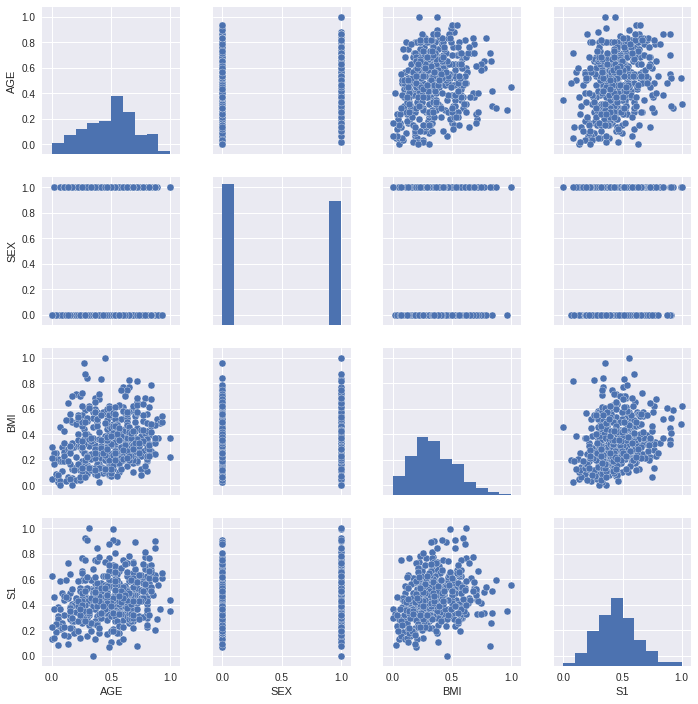

In [61]:
import seaborn as sns
sns.pairplot(L6[['AGE', 'SEX', 'BMI', 'S1']])

### We could do this more directly with Pandas

In [31]:
diabetes_data, diabetes_predictors, diabetes_targets = DS.load_data(0, "filesReg")

In [36]:
from sklearn import preprocessing as pre
pd.DataFrame(pre.minmax_scale(diabetes_predictors), 
             index=diabetes_predictors.index, 
             columns=diabetes_predictors.columns).head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6
0,0.666667,1.0,0.582645,0.549296,0.294118,0.256972,0.207792,0.282087,0.562217,0.439394
1,0.483333,0.0,0.148760,0.352113,0.421569,0.306773,0.623377,0.141044,0.222437,0.166667
2,0.883333,1.0,0.516529,0.436620,0.289216,0.258964,0.246753,0.282087,0.496578,0.409091
3,0.083333,0.0,0.301653,0.309859,0.495098,0.447211,0.233766,0.423131,0.572923,0.469697
4,0.516667,0.0,0.206612,0.549296,0.465686,0.417331,0.389610,0.282087,0.362385,0.333333


**P-values using ANOVA or f-regression**

L7=DS.uniFeatureReg(0)
L7

## Linear Regression

In linear regression we want to find a linear (straight) line that optimally fits our **continuous** labeled data.

### There are several things we need to consider here

#### A straight line: Is our Data Linear? Is the world Linear?

#### What do we mean by "optimally"?


### Linearity
#### Is the function below linear?

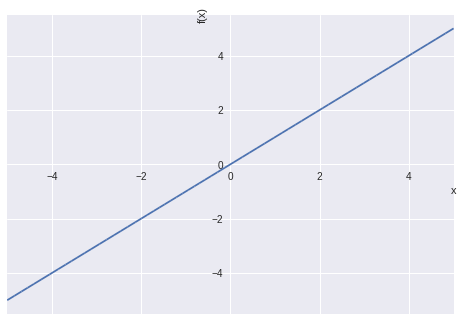

In [90]:
from sympy import symbols
from sympy.plotting import plot, plot3d, plot3d_parametric_line
x = symbols('x')
plot(x, (x,-5,5))

#### Is this function linear?

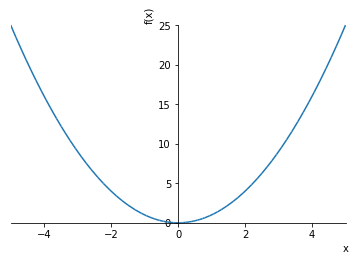

In [43]:
plot(x**2, (x,-5,5))

#### What about this?

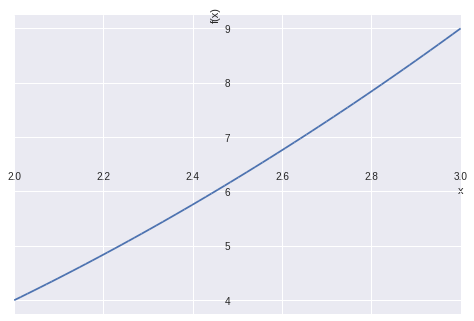

In [62]:
p1 = plot(x**2, (x,2,3))

### Optimality 

Optimal means that our model is the closest to our data, but we have to decide on what we mean by close.

#### Norms

\begin{equation}
||x||_p = \large(|x_1|^p + |x_2|^p+\cdots+|x_n|^p\large)^{\frac{1}{p}}
\end{equation}
* $L^2$
* $L^1$
* $L^\infty$

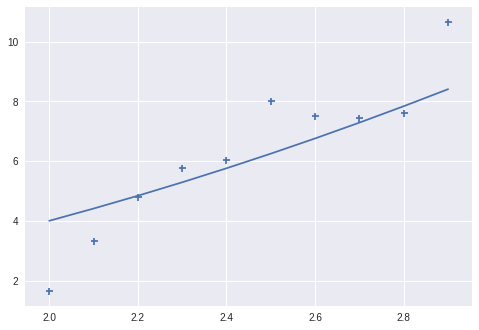

In [77]:
import matplotlib.pyplot as plt
import numpy as np
xs = np.arange(2,3,0.1)
import numpy.random as ra
ys_ = xs**2+ra.normal(0,1, size=xs.shape)
fig1, ax1 = plt.subplots(1)
plt.plot(xs,xs**2,axes=ax1)
ax1.scatter(xs, ys_, marker='+')

## Linear Regression

If we remember from high school, we can describe a straight line in the plane as 

\begin{equation}
y=mx+b
\end{equation}

So for example $m=0.55$ and $b=-2$ we would have the following line:

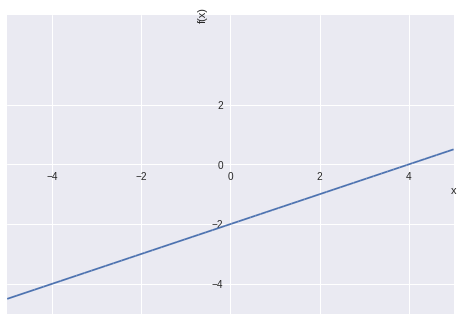

In [85]:
plot(x*0.5-2,(x,-5,5), ylim=(-5,5), axis=True, axis_center=(0,0))

### We can draw a line in 3D (depending on $x$ and $y$) $\cdots$

### Or 4D (depending on $x$, $y$, and $z$)

Of course this can extend on to arbitrary dimension, but our $x$, $y$, $z$ labeling for variables becomes problematic and we would typically do something like the following for our variable names

$x_1$ (x), $x_2$ (y), $x_3$ (z), $x_4$, $\cdots$, $x_n$

The mathematical expression of a linear regression in $n$ dimensions can be written as

\begin{equation}
\hat{y}= \Theta_0 + \Theta_1x_1 + \Theta_2x_2+\cdots+\Theta_nx_n
\end{equation}

$\Theta$ is the capital Greek letter ["theta"](https://en.wiktionary.org/wiki/theta#Pronunciation)

* $\hat{y}$ is the predicted value from our model
* $n$ is the number of features (independent variables) we have
* $x_i$ is the $i^{th}$ feature (variable)
* $\Theta_0$ corresponds to $b$ in our simple line
* $\Theta_1$ corresponds to $m$ in our simple line

##  Linear Regression 

<img src="../images/Linearregression.png" height= 55% width=55% style="right;">


<sub>
    Figure Reference: the first recommended book
</sub>

DS:runDifferentRegressionTrTeDataSet(),plotLearningCurvesRegression(): [a relative link](DS.py)

** From the below figure, is this a good model: predicted vs. real **

LinearRegression 53.8534458368


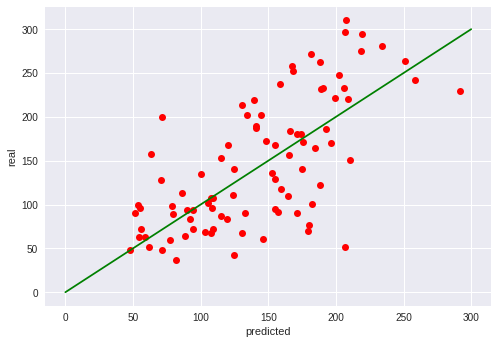

Press any key
diabetes LinearRegression 53.8534458368




In [100]:
L8=DS.runDifferentRegressionTrTeDataSet([0],[DS.Regs[0]],[0])

In [101]:
L8['diabetes'][2],L8['diabetes'][3], L8['diabetes'][4]

(-9.0559624996976424,
 array([   8.2612689 ,  -23.06446772,  141.48197617,   84.9935688 ,
        -261.46368693,  162.87932677,   46.32729542,   72.03113268,
         191.18672297,   13.3055384 ]),
 array([  3.87100290e+003,   9.62119329e-011,   2.78510477e+061,
          8.17029857e+036,   2.80390662e-114,   5.46503354e+070,
          1.31731235e+020,   1.91744736e+031,   1.07482758e+083,
          6.00512299e+005]))

** From the below figure, decribe the trends of the errors for validation and train datasets**

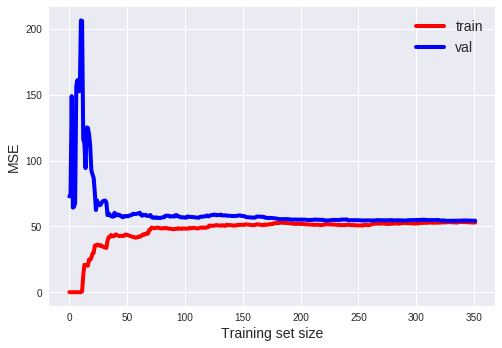

diabetes LinearRegression
Press Any Key


In [102]:
L9=DS.plotLearningCurvesRegression([0],[DS.Regs[0]],[0])

## Example

Does BMI predict BP?

Following the scikit-learn [example here](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py).

**Note:** had to address a [strange issue](https://stackoverflow.com/questions/38058486/fit-error-found-arrays-with-inconsistent-numbers-of-samples) with one predictor variable

In [107]:
diabetes_predictors["BMI"].shape, diabetes_predictors["BP"].shape

((442,), (442,))

[ 1.26995303]


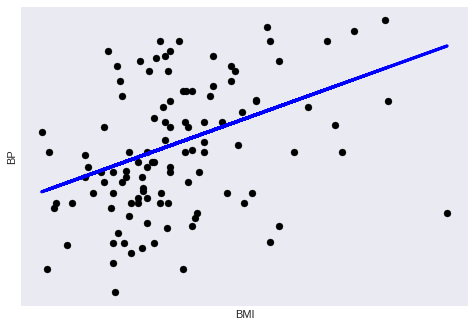

In [119]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split

lr = linear_model.LinearRegression()

X = diabetes_predictors["BMI"].reshape(-1,1)

y = diabetes_predictors["BP"]

X_train, X_test, y_train, y_test = train_test_split(X, y)
lr.fit(X_train, y_train)
print(lr.coef_)

plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, lr.predict(X_test), color='blue',
         linewidth=3)
plt.xlabel("BMI")
plt.ylabel("BP")
plt.xticks(())
plt.yticks(())

plt.show()

### How optimal is our model?

In [120]:
print("Mean squared error: %.2f"
      % np.mean((lr.predict(X_test) - y_test) ** 2))

Mean squared error: 143.75


# Exercise


## Parkinson’s Disease

Parkinson's disease (PD) is a chronic and progressive movement disorder, meaning that symptoms continue and worsen over time. Nearly one million people in the US are living with Parkinson's disease. The cause is unknown, and although there is presently no cure, there are treatment options such as medication and surgery to manage its symptoms.

Data set information, paper and the related links: https://archive.ics.uci.edu/ml/datasets/parkinsons

### Questions [Discuss the pseudo codes(steps)]

1. Use the file of code 1 instead of 0 to load the data, describe, scale, and calculate the related Mean/SD and p-values
2. Build a linear regression model and output the above results.
3. Plot the graphs of actual-prediction and learning curves.
4. Compare both data results and summarize your conclusions of the performances of the two data.
